In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
pd.options.mode.chained_assignment = None

# Análisis exploratorio venta de vehículos

Los datos vienen con un pequeño tratamiento para extraer campos de columnas con doble valor, posteriormente a este análisis se complementara esta parte ,en esta etapa se dará prioridad a la velocidad y posteriormente en el código de ETL se refinara el código para poder replicar con otros conjuntos de datos

In [2]:
FOLDER = "/home/oscar/GitHub/test_used_tl_ML/data/"

In [3]:
df = pd.read_csv(FOLDER + "train.csv", index_col=0)
df = df.reset_index(drop=True)

/tmp/ipykernel_404062/1023102910.py:1: DtypeWarning: Columns (6,10,14,24,25,26,30,32,38,41,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(FOLDER + "train.csv", index_col=0)


In [4]:
print(f"Cantidad de variables {len(df.columns)}, cantidad de observaciones {len(df)}")

Cantidad de variables 47, cantidad de observaciones 90003


### Perfilado inicial

In [5]:
profile = ProfileReport(df, minimal=True)
profile.to_file("output_initial.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

En esta parte se definen las variables mas importantes según el análisis del perfilador utilizado, en la parte siguiente de este informe solo se trataran las variables que tiene una cardinalidad baja, que el desequilibrio en las clases no sea mayor al 50% y que los valores faltantes no superen el 10%, así mismo las variables no soportadas se les hará un tratamiento de limpieza mas admitido y al final se compararan los dos análisis

### Limpieza posterior de las variables no soportadas

#### Variable seller_id

In [6]:
df["seller_id"].head()

0    8208882349
1    8141699488
2    8386096505
3    5377752182
4    2938071313
Name: seller_id, dtype: object

In [7]:
df["seller_id"].describe()

count          90000
unique         39432
top       5248662274
freq             599
Name: seller_id, dtype: int64

**Nota:** Esta columna para ce que para el objetivo del análisis de determinar si el carro ofrecido es nuevo o usado para ce que tiene poco valor ya que es un identificador de usuario, pero para campañas de marketing de los 90.000 datos analizados hay únicos 39.432, es decir que hay una población de vendedores por lo menos de mas de una venta, se procede a eliminar del análisis preliminar

In [8]:
na_seller_id = df[df["seller_id"].isnull() == True]
na_seller_id

,warranty,sub_status,condition,deal_ids,base_price,seller_id,variations,site_id,listing_type_id,price,...,start_time,permalink,sold_quantity,available_quantity,seller_address_country_name,seller_address_state_name,seller_address_city_name,shipping_local_pick_up,shipping_free_shipping,Y
16693,Envios a capital federal $26.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83019,4 meses de Garantía,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83841,Envios capital federeal $26.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
na_seller_id = list(na_seller_id.index)

In [10]:
df = df.drop(na_seller_id, axis=0)

In [11]:
df = df.drop("seller_id", axis=1)

#### Variable price

In [12]:
df["price"].tail()

89998      68.0
89999     126.0
90000     300.0
90001    696.58
90002     470.0
Name: price, dtype: object

In [13]:
df["price"].describe()

count     90000.0
unique    11788.0
top          50.0
freq       2124.0
Name: price, dtype: float64

In [14]:
na_price = df[df["price"].isnull() == True]
na_price

,warranty,sub_status,condition,deal_ids,base_price,variations,site_id,listing_type_id,price,attributes,...,start_time,permalink,sold_quantity,available_quantity,seller_address_country_name,seller_address_state_name,seller_address_city_name,shipping_local_pick_up,shipping_free_shipping,Y


In [15]:
df["temp_column_price"] = df["price"].apply(lambda x: type(x) != float)

In [16]:
type(df["price"][df["temp_column_price"] == True].iloc[0])

str

In [17]:
for i in range(len(df)):
    if df["temp_column_price"].iloc[i] == True:
        try:
            df["price"].iloc[i] = float(df["price"].iloc[i])
        except:
            df["price"].iloc[i] = float("nan")

In [18]:
na_price = df[df["price"].isnull() == True]
na_price

,warranty,sub_status,condition,deal_ids,base_price,variations,site_id,listing_type_id,price,attributes,...,permalink,sold_quantity,available_quantity,seller_address_country_name,seller_address_state_name,seller_address_city_name,shipping_local_pick_up,shipping_free_shipping,Y,temp_column_price
16694,[],used,[],80.0,9.357516e+09,MLA,bronze,80.0,NaN,buy_it_now,...,0,1.0,Argentina,Capital Federal,tribunales,False,False,used,NaN,True
83020,[],new,[],5500.0,8.714872e+09,MLA,bronze,5500.0,NaN,buy_it_now,...,0,1.0,Argentina,Capital Federal,Almagro,False,False,new,NaN,True
83842,[],new,[],100.0,9.357516e+09,MLA,bronze,100.0,NaN,buy_it_now,...,0,1.0,Argentina,Capital Federal,tribunales,True,False,new,NaN,True


In [19]:
na_price = list(na_price.index)

In [20]:
df = df.drop(na_price, axis=0)

In [21]:
max(df["price"]), min(df["price"])

(2222222222.0, 0.84)

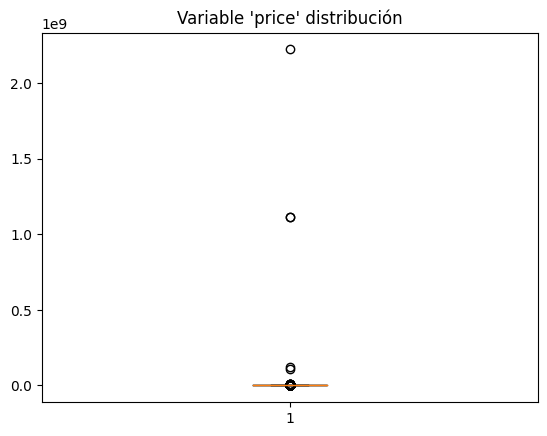

In [22]:
plt.boxplot(df["price"])
plt.title("Variable 'price' distribución")
plt.show()

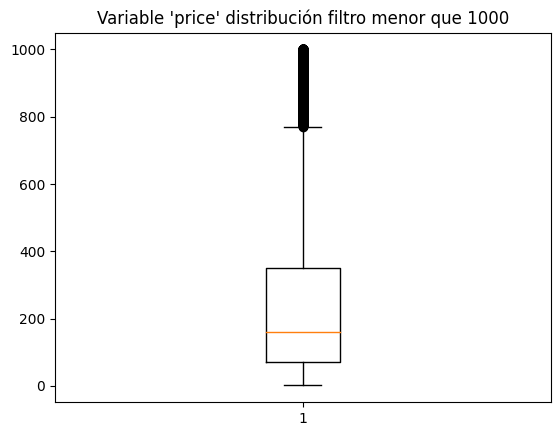

In [23]:
plt.boxplot(df["price"][df["price"] < 1000])
plt.title("Variable 'price' distribución filtro menor que 1000")
plt.show()

In [24]:
len(df["price"][df["price"] < 10000])

86365

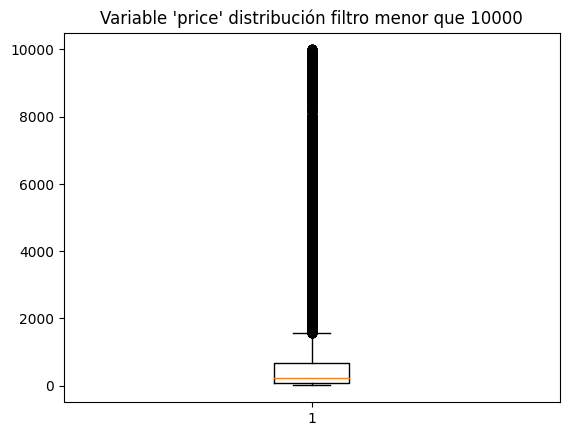

In [25]:
plt.boxplot(df["price"][df["price"] < 10000])
plt.title("Variable 'price' distribución filtro menor que 10000")
plt.show()

In [26]:
(1 - len(df["price"][df["price"] < 10000]) / len(df)) * 100

4.035690078558174

**Nota :** Esta columna presenta varios valore atípicos por esta razón se procede a eliminar los valores que estén por encima de 100.000, perdiendo solo el 4% de los datos originales, al valor mayor es de 2.222.222.222 que es muy atípico

In [27]:
df = df[df["price"] < 10000]

In [28]:
len(df)

86365

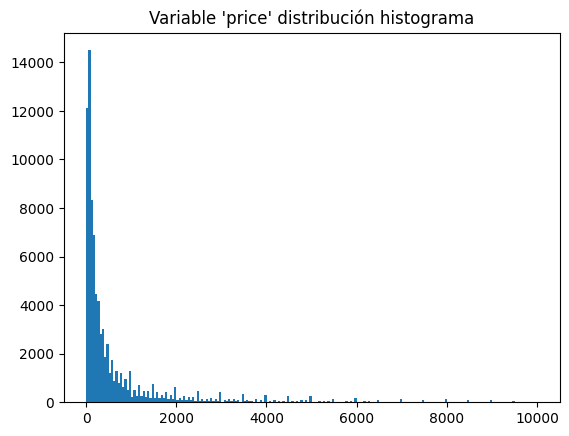

In [29]:
plt.hist(df["price"], bins=200)
plt.title("Variable 'price' distribución histograma")
plt.show()

#### Variable original price

In [30]:
df["original_price"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: original_price, dtype: object

In [31]:
na_original_price = df[df["original_price"].isnull() == True]
na_original_price

,warranty,sub_status,condition,deal_ids,base_price,variations,site_id,listing_type_id,price,attributes,...,permalink,sold_quantity,available_quantity,seller_address_country_name,seller_address_state_name,seller_address_city_name,shipping_local_pick_up,shipping_free_shipping,Y,temp_column_price
0,NaN,[],new,[],80.00,[],MLA,bronze,80.0,[],...,http://articulo.mercadolibre.com.ar/MLA4695330...,0.0,1,Argentina,Capital Federal,San Cristóbal,True,False,new,False
1,NUESTRA REPUTACION,[],used,[],2650.00,[],MLA,silver,2650.0,[],...,http://articulo.mercadolibre.com.ar/MLA7160447...,0.0,1,Argentina,Capital Federal,Buenos Aires,True,False,used,False
2,NaN,[],used,[],60.00,[],MLA,bronze,60.0,[],...,http://articulo.mercadolibre.com.ar/MLA7367189...,0.0,1,Argentina,Capital Federal,Boedo,True,False,used,False
3,NaN,[],new,[],580.00,[],MLA,silver,580.0,[],...,http://articulo.mercadolibre.com.ar/MLA9191625...,0.0,1,Argentina,Capital Federal,Floresta,True,False,new,False
4,MI REPUTACION.,[],used,[],30.00,[],MLA,bronze,30.0,[],...,http://articulo.mercadolibre.com.ar/MLA7787961...,0.0,1,Argentina,Buenos Aires,Tres de febrero,True,False,used,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89998,Sin garantía,[],used,[],68.00,[],MLA,bronze,68.0,[],...,http://articulo.mercadolibre.com.ar/MLA1315520...,0.0,1,Argentina,Capital Federal,capital federal,False,False,used,True
89999,NaN,[],new,[],126.00,[],MLA,bronze,126.0,[],...,http://articulo.mercadolibre.com.ar/MLA6934377...,1.0,1,Argentina,Capital Federal,Núñez,True,False,new,True
90000,NaN,[],new,[],300.00,[],MLA,bronze,300.0,[],...,http://articulo.mercadolibre.com.ar/MLA5644559...,0.0,1,Argentina,Buenos Aires,La Matanza,True,False,new,True
90001,La garantia solo responde en caso de fallas de...,[],new,[],696.58,[],MLA,bronze,696.58,[],...,http://articulo.mercadolibre.com.ar/MLA3520244...,0.0,100,Argentina,Chubut,Trelew,False,False,new,True


**Nota:** Esta variable tiene todos su valores NA así que se procede a eliminar

In [32]:
df = df.drop(["original_price", "temp_column_price"], axis=1)

#### Variable automatic_relist

In [33]:
df["automatic_relist"].head()

0    False
1    False
2    False
3    False
4    False
Name: automatic_relist, dtype: object

In [34]:
df["automatic_relist"] = df["automatic_relist"].apply(lambda x: type(x) != bool)
for i in range(len(df)):
    if df["automatic_relist"].iloc[i] == True:
        try:
            df["automatic_relist"].iloc[i] = float(df["automatic_relist"].iloc[i])
        except:
            df["automatic_relist"].iloc[i] = float("nan")

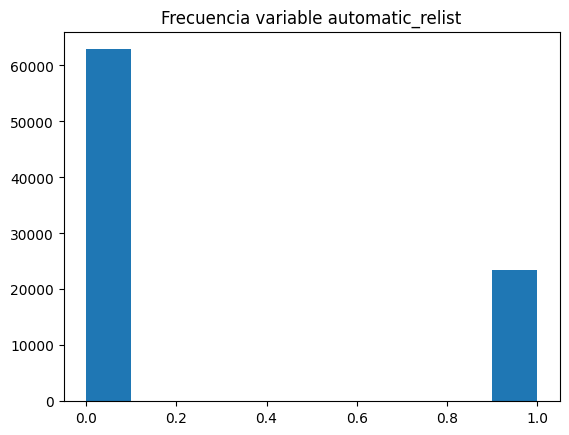

In [35]:
plt.hist(df["automatic_relist"])
plt.title("Frecuencia variable automatic_relist")
plt.show()

In [36]:
na_automatic_relist = df[df["automatic_relist"].isnull() == True]
na_automatic_relist

,warranty,sub_status,condition,deal_ids,base_price,variations,site_id,listing_type_id,price,attributes,...,start_time,permalink,sold_quantity,available_quantity,seller_address_country_name,seller_address_state_name,seller_address_city_name,shipping_local_pick_up,shipping_free_shipping,Y


**Nota:** Esta variable esta des balanceada pero se tendrá en cuenta en el análisis inicial 

#### Variable stop_time y start_time

In [37]:
df["stop_time"].head()

0    1446669773000
1    1448474910000
2    1447027027000
3    1449191596000
4    1445638040000
Name: stop_time, dtype: object

In [38]:
df["start_time"].head()

0    1441485773000
1    1443290910000
2    1441843027000
3    1443466076000
4    1440454040000
Name: start_time, dtype: object

**Nota:** Esta variable es una marca de tiempo y el problema es de clasificación así que no se tendrán en cuenta y se eliminaran de este análisis

In [39]:
df = df.drop(["stop_time", "start_time"], axis=1)

#### Variable available_quantity

In [40]:
df["available_quantity"].head()

0    1
1    1
2    1
3    1
4    1
Name: available_quantity, dtype: object

In [41]:
df["available_quantity"] = df["available_quantity"].apply(lambda x: type(x) != int)
for i in range(len(df)):
    if df["available_quantity"].iloc[i] == True:
        try:
            df["available_quantity"].iloc[i] = float(df["available_quantity"].iloc[i])
        except:
            df["available_quantity"].iloc[i] = float("nan")

In [42]:
na_available_quantity = df[df["available_quantity"].isnull() == True]
na_available_quantity

,warranty,sub_status,condition,deal_ids,base_price,variations,site_id,listing_type_id,price,attributes,...,initial_quantity,permalink,sold_quantity,available_quantity,seller_address_country_name,seller_address_state_name,seller_address_city_name,shipping_local_pick_up,shipping_free_shipping,Y


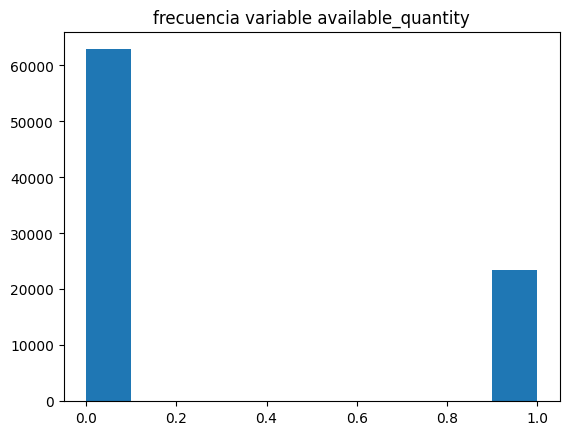

In [43]:
plt.hist(df["available_quantity"])
plt.title("frecuencia variable available_quantity")
plt.show()

**Nota:** Esta variable esta des balanceada pero se tendrá en cuenta en el análisis inicial 

#### Variable shipping_free_shipping

In [44]:
df["shipping_free_shipping"].head()

0    False
1    False
2    False
3    False
4    False
Name: shipping_free_shipping, dtype: object

In [45]:
df["shipping_free_shipping"] = df["shipping_free_shipping"].apply(lambda x: type(x) != int)
for i in range(len(df)):
    if df["shipping_free_shipping"].iloc[i] == True:
        try:
            df["shipping_free_shipping"].iloc[i] = float(df["shipping_free_shipping"].iloc[i])
        except:
            df["shipping_free_shipping"].iloc[i] = float("nan")

In [46]:
na_shipping_free_shipping = df[df["shipping_free_shipping"].isnull() == True]
na_shipping_free_shipping

,warranty,sub_status,condition,deal_ids,base_price,variations,site_id,listing_type_id,price,attributes,...,initial_quantity,permalink,sold_quantity,available_quantity,seller_address_country_name,seller_address_state_name,seller_address_city_name,shipping_local_pick_up,shipping_free_shipping,Y


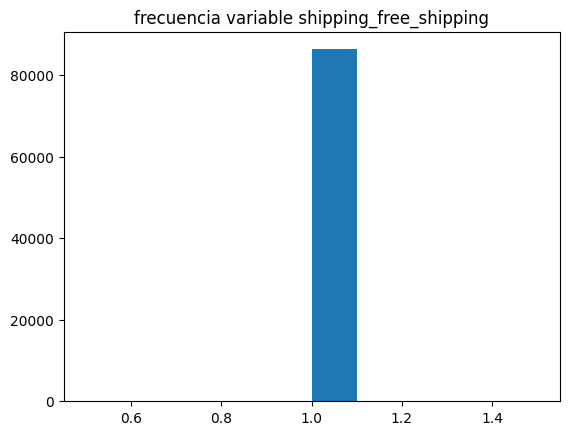

In [47]:
plt.hist(df["shipping_free_shipping"])
plt.title("frecuencia variable shipping_free_shipping")
plt.show()

**Nota:** Esta variable tiene todos su valores igual a 1 así que se procede a eliminar

In [48]:
df = df.drop(["shipping_free_shipping"], axis=1)

#### Variable warranty

Esta es una variable de tipo categórica, pero se quiere mejorar su desempeño con algo de tratamiento de texto, transformando todo el texto a minúscula y quitando los acentos con el fin de reducir las categorías

In [49]:
df["warranty"] = df["warranty"].apply(lambda x: str(x).lower())

In [50]:
def remove_accents(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

In [51]:
df["warranty"] = df["warranty"].apply(lambda x: remove_accents(x))

In [52]:
df = df.drop("warranty", axis=1)

**Nota:** Esta variable tiene todos su valores NA así que se procede a eliminar

#### Variable official_store_id

In [53]:
df["official_store_id"] = df["official_store_id"].astype(str)

**Nota:** Esta variable en realidad es categórica se hace la transformación respectiva

### Perfilado posterior a la limpieza

In [54]:
profile = ProfileReport(df, minimal=True)
profile.to_file("output_clean.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Nota:** Con esta limpieza posterior mas especifica de variables las alertas se redujeron a de 53 a 45 los valores no procesables, se prosiguen analizando las variables para tener el mejor pre procesamiento

#### Variable listing_source 

In [55]:
df["listing_source"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: listing_source, dtype: object

In [56]:
na_listing_source = df[df["listing_source"].isnull() == True]
na_listing_source

,sub_status,condition,deal_ids,base_price,variations,site_id,listing_type_id,price,attributes,buying_mode,...,subtitle,initial_quantity,permalink,sold_quantity,available_quantity,seller_address_country_name,seller_address_state_name,seller_address_city_name,shipping_local_pick_up,Y
0,[],new,[],80.00,[],MLA,bronze,80.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA4695330...,0.0,False,Argentina,Capital Federal,San Cristóbal,True,new
1,[],used,[],2650.00,[],MLA,silver,2650.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA7160447...,0.0,False,Argentina,Capital Federal,Buenos Aires,True,used
2,[],used,[],60.00,[],MLA,bronze,60.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA7367189...,0.0,False,Argentina,Capital Federal,Boedo,True,used
3,[],new,[],580.00,[],MLA,silver,580.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA9191625...,0.0,False,Argentina,Capital Federal,Floresta,True,new
4,[],used,[],30.00,[],MLA,bronze,30.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA7787961...,0.0,False,Argentina,Buenos Aires,Tres de febrero,True,used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89998,[],used,[],68.00,[],MLA,bronze,68.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA1315520...,0.0,1.0,Argentina,Capital Federal,capital federal,False,used
89999,[],new,[],126.00,[],MLA,bronze,126.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA6934377...,1.0,1.0,Argentina,Capital Federal,Núñez,True,new
90000,[],new,[],300.00,[],MLA,bronze,300.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA5644559...,0.0,1.0,Argentina,Buenos Aires,La Matanza,True,new
90001,[],new,[],696.58,[],MLA,bronze,696.58,[],buy_it_now,...,NaN,100.0,http://articulo.mercadolibre.com.ar/MLA3520244...,0.0,1.0,Argentina,Chubut,Trelew,False,new


In [57]:
df = df.drop("listing_source", axis=1)

**Nota:** Esta variable tiene todos su valores NA así que se procede a eliminar

#### Variable diferential_pricing

In [58]:
df["differential_pricing"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: differential_pricing, dtype: object

In [59]:
na_differential_pricing = df[df["differential_pricing"].isnull() == True]
na_differential_pricing

,sub_status,condition,deal_ids,base_price,variations,site_id,listing_type_id,price,attributes,buying_mode,...,subtitle,initial_quantity,permalink,sold_quantity,available_quantity,seller_address_country_name,seller_address_state_name,seller_address_city_name,shipping_local_pick_up,Y
0,[],new,[],80.00,[],MLA,bronze,80.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA4695330...,0.0,False,Argentina,Capital Federal,San Cristóbal,True,new
1,[],used,[],2650.00,[],MLA,silver,2650.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA7160447...,0.0,False,Argentina,Capital Federal,Buenos Aires,True,used
2,[],used,[],60.00,[],MLA,bronze,60.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA7367189...,0.0,False,Argentina,Capital Federal,Boedo,True,used
3,[],new,[],580.00,[],MLA,silver,580.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA9191625...,0.0,False,Argentina,Capital Federal,Floresta,True,new
4,[],used,[],30.00,[],MLA,bronze,30.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA7787961...,0.0,False,Argentina,Buenos Aires,Tres de febrero,True,used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89998,[],used,[],68.00,[],MLA,bronze,68.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA1315520...,0.0,1.0,Argentina,Capital Federal,capital federal,False,used
89999,[],new,[],126.00,[],MLA,bronze,126.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA6934377...,1.0,1.0,Argentina,Capital Federal,Núñez,True,new
90000,[],new,[],300.00,[],MLA,bronze,300.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA5644559...,0.0,1.0,Argentina,Buenos Aires,La Matanza,True,new
90001,[],new,[],696.58,[],MLA,bronze,696.58,[],buy_it_now,...,NaN,100.0,http://articulo.mercadolibre.com.ar/MLA3520244...,0.0,1.0,Argentina,Chubut,Trelew,False,new


In [60]:
df = df.drop("differential_pricing", axis=1)

**Nota:** Esta variable tiene todos su valores NA así que se procede a eliminar

#### Variable subtitle

In [61]:
df["subtitle"].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: subtitle, dtype: float64

In [62]:
na_subtitle = df[df["subtitle"].isnull() == True]
na_subtitle

,sub_status,condition,deal_ids,base_price,variations,site_id,listing_type_id,price,attributes,buying_mode,...,subtitle,initial_quantity,permalink,sold_quantity,available_quantity,seller_address_country_name,seller_address_state_name,seller_address_city_name,shipping_local_pick_up,Y
0,[],new,[],80.00,[],MLA,bronze,80.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA4695330...,0.0,False,Argentina,Capital Federal,San Cristóbal,True,new
1,[],used,[],2650.00,[],MLA,silver,2650.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA7160447...,0.0,False,Argentina,Capital Federal,Buenos Aires,True,used
2,[],used,[],60.00,[],MLA,bronze,60.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA7367189...,0.0,False,Argentina,Capital Federal,Boedo,True,used
3,[],new,[],580.00,[],MLA,silver,580.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA9191625...,0.0,False,Argentina,Capital Federal,Floresta,True,new
4,[],used,[],30.00,[],MLA,bronze,30.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA7787961...,0.0,False,Argentina,Buenos Aires,Tres de febrero,True,used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89998,[],used,[],68.00,[],MLA,bronze,68.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA1315520...,0.0,1.0,Argentina,Capital Federal,capital federal,False,used
89999,[],new,[],126.00,[],MLA,bronze,126.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA6934377...,1.0,1.0,Argentina,Capital Federal,Núñez,True,new
90000,[],new,[],300.00,[],MLA,bronze,300.0,[],buy_it_now,...,NaN,1.0,http://articulo.mercadolibre.com.ar/MLA5644559...,0.0,1.0,Argentina,Buenos Aires,La Matanza,True,new
90001,[],new,[],696.58,[],MLA,bronze,696.58,[],buy_it_now,...,NaN,100.0,http://articulo.mercadolibre.com.ar/MLA3520244...,0.0,1.0,Argentina,Chubut,Trelew,False,new


In [63]:
df = df.drop("subtitle", axis=1)

### Variables a eliminar por una alta cardinalidad, valor único o un des balanceo mayor

En el informe output_clean.html de este repositorio están los valores y la explicación mas detallada consultar si se tiene alguna duda el archivo se puede abrir sin problema en cualquier navegador

In [64]:
drop_columns = ["sub_status", # esta variable tiene 85.496 valores "[]"
                "deal_ids", # esta variable tiene 86.154 valores "[]"
                "variations", # esta variable tiene 78.997 valores "[]"
                "site_id", # Todos los valores son MLA
                "attributes", # esta variable tiene 77.005 valores "[]"
                "buying_mode", # esta variable tiene 85.496 valores "buy_it_now"
                "parent_item_id", # esta variable tiene muy alta cardinalidad
                "coverage_areas", # todos los valores con "[]"
                "last_updated", # esta variable es de tipo date
                "international_delivery_mode", # todos los valores son none
                "pictures", # se eliminará pues son links a imagenes y nos estan disponibles, para el futuro se puede contemplar imagénes para determinar si es nuevo o usado 
                "id", # esta variable es un identificador único
                "accepts_mercadopago", # esta variable tiene 86.146 valores "True"
                "currency_id", # esta variable tiene 86.347 valores "True"
                "thumbnail", # son imagenes interesante para analisis posteriores 
                "date_created", # este valor es detipo date 
                "status", # esta variable tiene 86.146 valores "active"
                "video_id", # esta variable son id de videos que no son útiles para analizar
                "catalog_product_id", # esta variable es un identificador
                "permalink", # link de la publicación
                "sold_quantity", # todos los valores son 0
                "seller_address_country_name", # todos los valores son iguales a Argentina
                "shipping_local_pick_up", # # esta variable tiene 70.015 valores "True"                
                "initial_quantity", # el 95% de los valores son 0
                "condition", # es la variable objetivo
                "official_store_id" # # esta variable tiene 85.638 valores NAN
                ]

In [65]:
df = df.drop(drop_columns, axis=1)

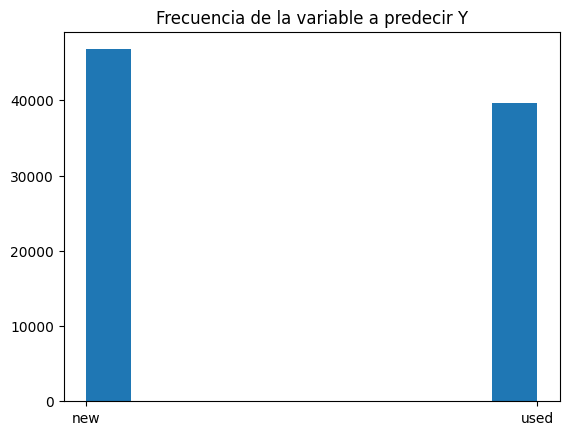

In [66]:
plt.hist(df["Y"])
plt.title("Frecuencia de la variable a predecir Y")
plt.show()

In [67]:
profile = ProfileReport(df, minimal=True)
profile.to_file("output_final.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [68]:
print(f"Cantidad de variables {len(df.columns)}, cantidad de observaciones {len(df)}")

Cantidad de variables 12, cantidad de observaciones 86365


En este ejercicio de preparación de los datos se redujo de 47 variables a 12 y se redujo la cantidad de datos de 90003 a 86365 es decir redujeron las observaciones de 4,04 %

### Exploraciones adicionales

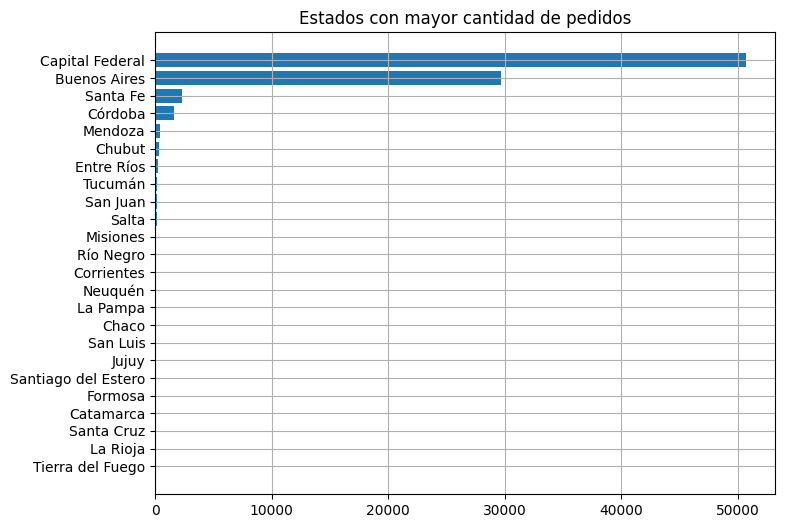

In [108]:
plt.figure(figsize=(8, 6))
df_seller_address_state_name = df.groupby("seller_address_state_name").agg({"seller_address_state_name": "count"})
df_seller_address_state_name = df_seller_address_state_name.rename(columns={"seller_address_state_name": "Estado"})
df_seller_address_state_name = df_seller_address_state_name.sort_values("Estado")
plt.barh(list(df_seller_address_state_name.index), df_seller_address_state_name["Estado"])
plt.title("Estados con mayor cantidad de pedidos")
plt.grid()
plt.show()

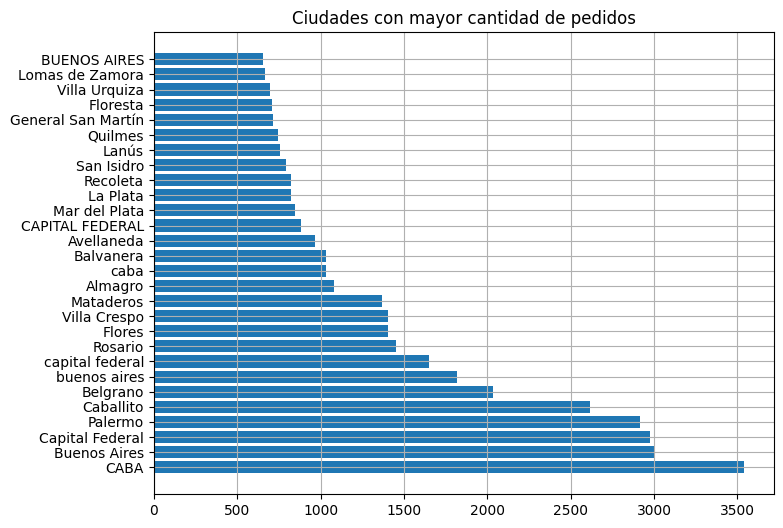

In [110]:
plt.figure(figsize=(8, 6))
df_seller_address_state_name = df.groupby("seller_address_city_name").agg({"seller_address_city_name": "count"})
df_seller_address_state_name = df_seller_address_state_name.rename(columns={"seller_address_city_name": "Ciudad"})
df_seller_address_state_name = df_seller_address_state_name.sort_values("Ciudad", ascending=False)
df_seller_address_state_name = df_seller_address_state_name[0:28]
plt.barh(list(df_seller_address_state_name.index), df_seller_address_state_name["Ciudad"])
plt.title("Ciudades con mayor cantidad de pedidos")
plt.grid()
plt.show()